**Declare the module and library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score

**Step 1 : Load the raw data**

In [ ]:
url_data = r"coaster_db.csv"
df = pd.read_csv(url_data)

In [ ]:
## display the datframe
df.head(2)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0


In [ ]:
##Get the list of all columns
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [ ]:
## check for nullable values in all columns
df.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [ ]:
#@ get the total rows and columns of dataframe
df.shape

(1087, 56)

**Step 2: get the height and spped column from dataframe  and fillter one outlier values **

In [ ]:
df_height_speed= df[["height_value","speed_mph"]]
df_height_speed.dropna(axis=0, inplace=True)
df_height_speed.head(2)

<ipython-input-72-b3781fd6a62e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_height_speed.dropna(axis=0, inplace=True)


,height_value,speed_mph
0,50.0,6.0
6,41.0,10.0
13,72.5,40.0
15,16.0,37.3
16,70.0,40.0


In [ ]:
## filter out the one height values
df_height_speed =df_height_speed[(df["height_value"] < 3900)]

<ipython-input-97-c7239ff5a046>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_height_speed =df_height_speed[(df["height_value"] < 3900)]


**Step 3: Display the data in chart for visiualization and understand the trend of data**

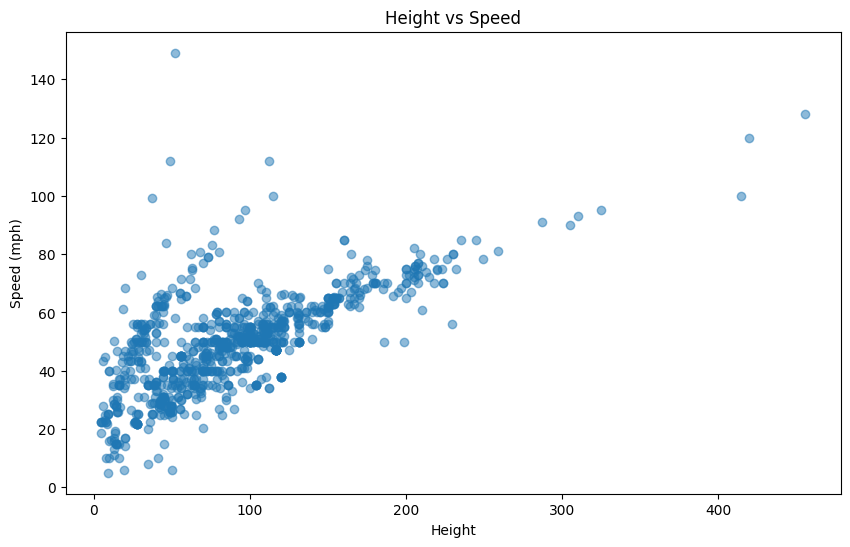

In [ ]:
# @title Height vs Speed

plt.figure(figsize=(10, 6))
#alpha -- The alpha blending value, between 0 (transparent) and 1 (opaque).
plt.scatter( df_height_speed['height_value'],df_height_speed['speed_mph'], alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Speed (mph)')
_ = plt.title('Height vs Speed')

**Step 4: initialized input and output variable **

In [ ]:
inputx = df_height_speed.iloc[:, :-1].values
outputy = df_height_speed.iloc[:, 1].values

**Step 5: split the data into train and test for input and output**

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(inputx, outputy, test_size = 1/4, random_state = 7)

**Step 6: selecting the simple Linear Regression model**

In [ ]:
# model = LinearRegression()
model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True)
print("\nThe parameters of the model are\n\n",model.get_params())
#print(model.set_params())
print("\nThe model we are using is ", model.fit(input_train, output_train))


The parameters of the model are

 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

The model we are using is  LinearRegression(positive=True)


In [ ]:
mean_squared_error1 = mean_squared_error(output_test, model.predict(input_test))
print("\nThe mean squared error is ", mean_squared_error1)


The mean squared error is  95.76451072052754


In [ ]:
r2_score = r2_score(output_test, model.predict(input_test))
print("\nThe r2 score is ", r2_score)


The r2 score is  0.5926020113459822


In [ ]:
years = float(input("\nGive height of roller coster "))
testinput = [[years]]
predicted_output = model.predict(testinput)
print('\nThe height of roller coster is ',testinput)
print('\nThe sped of roller coster is ',predicted_output)


Give height of roller coster 400

The height of roller coster is  [[400.0]]

The sped of roller coster is  [112.77991371]


**step 7: Visualising the training results**

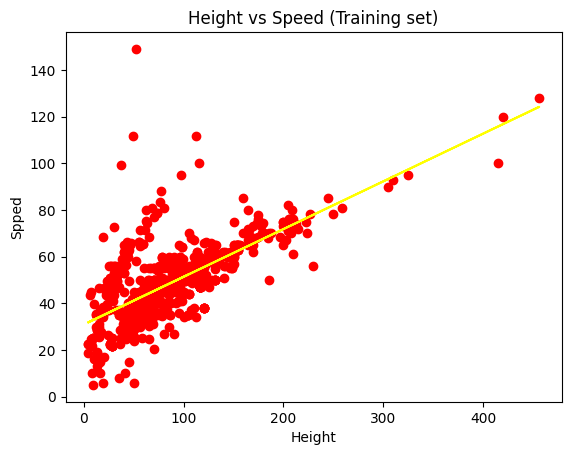

In [ ]:
plt.scatter(input_train, output_train, color = 'red')
plt.plot(input_train, model.predict(input_train), color = 'yellow')
plt.title('Height vs Speed (Training set)')
plt.xlabel('Height')
plt.ylabel('Spped')
plt.show()